<center><font size=4><b>ML For Bio</b></center><br>
<center><font size=3><b>Spectral Clustering</b></center><br>
<b><font size=3>Javad Razi (401204354)</b>

---

<font face="Arial" size=4><br>
    
One type of common methods for clustering are the <b>Spectral Clustering</b> methods, which we would learn in this execise.
<br><br>
Spectral Clustering is a type of clustering algorithm in machine learning that <b>uses eigenvectors of a similarity matrix</b> to divide a set of data points into clusters. The basic idea behind spectral clustering is to use the eigenvectors of the Laplacian matrix of a graph to represent the data points and find clusters by applying k-means or another clustering algorithm to the eigenvectors. <br><br>
    
<div> <br>
<center>
<img src="https://images.squarespace-cdn.com/content/v1/5d782753c70af105c29a9b14/1608653466446-YC3DJUQR7FDU35XM90AE/shutterstock_1410280415.jpg?format=1000w" width="700">
</center>
</div><br>
      
Consider the matrix <b>$W$</b> representing the similarity of data points, where $(i,j)$ entry is non-zero if samples $(x^{(i)}, x^{(j)})$ are in the mutual KNN (k-nearest neighbors) of each other.<br><br>
    $$W_{ij} = \begin{cases}
    1, & x^{(i)} \in KNN \{x^{(j)}\} \hspace{3mm} AND \hspace{3mm} x^{(j)} \in KNN \{x^{(i)}\} \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Another method to define <b>$W$</b> is to use a fully connected graph, where the value of its entries are obtained from a function which measures the similarity of these samples.<br><br>
    $$W_{ij} =  k(x^{(i)}, x^{(j)})$$ <br><br>
    where $k(x^{(i)}, x^{(j)})$ is a function to measure the similarity of two samples. An example of this function could be the <b>Radial Basis Function (RBF)</b>, defined as:
    $$k(x^{(i)}, x^{(j)}) = exp(-\gamma \lVert x^{(i)} - x^{(j)} \rVert)$$
   <br> We call matrix <b>$W$</b> the adjacency matrix. (There are other types of definitions for this matrix, like the $\epsilon$-neighborhood graph, simple KNN graph, etc.) <br><br>
    The degree of each vertex in the graph is defined as $g_i = \sum_{j}^{} w_{ij}$.
    Also, consider the diagonal matrix <b>$G$</b>, defined as: <br><br>
    $$G_{ij} = \begin{cases}
    g_i, & i=j \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Now we are ready to define the <b>Laplacian</b> matrix <b>$L$</b>:
    $$L = G - W $$<br><br><br>
    It can be shown the eigenvectors of <b>$L$</b> corresponding to the 𝑚 smallest eigenvalues are appropriate for clustering. In other words, we first compute the 𝑚 smallest eigenvalues $\lambda_i$ and their corresponding eigenvectors $\phi_i$. Let $\Phi \in \mathbb{R} ^{p\times m}$ be a matrix consisting of $\{\phi_i\}_{i=1}^{m}$, i.e. the first(smallest)  eigenvectors of <b>$L$</b>:<br><br>
    $$\Phi(x^{(i)}) = [\phi_1(x^{(i)}), \phi_2(x^{(i)}), ..., \phi_m(x^{(i)})]^T \in \mathbb{R}^m$$ <br>
    In other words, we transform the original data $x^{(i)}$ from $\mathbb{R}^{p}$ to $\mathbb{R}^{m}$ through the first m eigenvectors of <b>$L$</b>: it is a nonlinear transformation. The $\it{i}$th row of $\Phi$ represents the $\it{i}$th data point in the new feature space. This step is also called Laplacian eigenmap, which is the key step in spectral clustering.
    <br><br> Now, in the final step, we need to apply K-means clustering to the rows of $\Phi$ to group the data into m clusters.

<font face="Arial" size=4>
<br>In summary, the procedure consists of 4 steps: <br><br>
    <b>1.</b> Constuct the adjacency matrix <b>$W$</b>. <br> <br>
    <b>2.</b> Find the corresponding laplacian matrix <b>$L$</b>. <br><br>
    <b>3.</b> Find the m smallest eigenvalues and their corresponding eigenvectors $\{\phi_i\}_{i=1}^{m}$. Transform the samples in the original feature space into the new one, using the matrix $\Phi$. <br><br>
    <b>4.</b> Apply K-Means in this new feature space. <br><br>

## Part (A) (Bonus)
<font face="Arial" size=4>
<br>Prove that Laplacian Matrix is positive semi-definite. (Therefore, all the eigenvalues of <b>$L$</b> are $\geq 0$)

### Answer
First, we know that Laplacian Matrix is a [Diagonally dominant matrix](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). That is, for every row of the matrix, the magnitude of the diagonal entry in a row is GTE than the sum of the magnitudes of all the other (non-diagonal) entries in that row.This is obvious by looking at the definition of Laplacian Matrix described above. 
<br><br>
Since Laplacian Matrix is also symmetric, then we can write $L=D.D^T$. 
<br>
Thus, we have: 
<br><br>
$x^TLx=∥Dx∥^2 ≥ 0$
<br><br>
Thus, we have proven that $L$ has non-negative eigenvalues

## Part (B)
<font face="Arial" size=4> <br>
We stated that the transformation must be done using the eigenvectos corresponding to the smallest eigenvalues of laplacian matrix. This can be proved mathematically; however, we want to illustrate it with a simple example. <br>

It can be shown that as the eigenvalues of the laplacian matrix gets closer to zero, the graph is more disconnected! <br>
Explain the above statement in the following gif. In other words, explain the effect of adding edges to the graph on the eigenvalues of the laplacian matrix:
<div> <br>
<center>
<img src="spectral.gif" width="700">
</center>
</div><br>

### Answer
Adding edges to a graph can change the Laplacian matrix and affect its eigenvalues, particularly the smallest non-zero eigenvalue known as the algebraic connectivity. The algebraic connectivity reflects the graph's connectedness and is crucial for spectral clustering algorithms that use the Laplacian matrix. A low algebraic connectivity indicates disconnected clusters in the graph, leading to poor clustering results. Adding edges can enhance connectivity, reducing the number of disconnected clusters and improving clustering performance. However, excessive edge addition can cause a fully connected graph, producing a degenerate Laplacian matrix with all eigenvalues equal to zero.

<font face="Arial" size=4>
Why do you think the second eigenvalue is close to zero in the following graph?
<div> <br>
<center>
<img src="spectral_final.png" width="700">
</center>
</div><br>

### Answer: 
According to [Cheeger Inequalities](https://en.wikipedia.org/wiki/Cheeger_constant_(graph_theory)#Cheeger_Inequalities), the number of edges between the two subgraphs of G that are the least connected to one another are bound based on the second smallest eigenvalue of the Laplacian of G. If the graph has two disconnected components, λ2 = 0. And if λ2 is small, this suggests the graph is nearly disconnected, that it has two components that are not very connected to each other.

## Part (C)
<font face="Arial" size=4> <br>
Here we want to compare the results of spectral clustering to the typical K-Means clustering. Consider the following dataset:

In [189]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Config libraries
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
sklearn.set_config(transform_output="pandas")

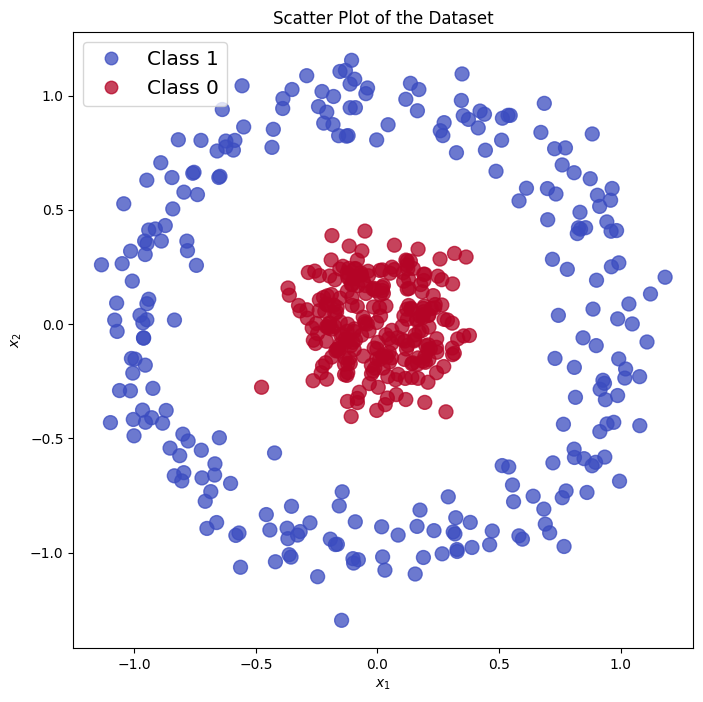

In [190]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


X, labels = make_circles(500, factor=0.2, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

<font face="Arial" size=4>
Assume that the true labels are unknown, and we need to cluster the samples into two clusters. Apply K-Means algorithm with $K=2$ on the samples and plot the resulting clusters. <br> What do you think about the clusters from K-Means? Do the results match with the true labels?

### Answer
No, the results aren't expected to match with the true labels. kmeans doesn't work well for datasets like this when clusters are shaped like nested spheres. Because in kmeans, the distance from the cluster center assigns points to clusters, and cluster centers are moved based on the mean coordinates of their points. Thus, there is no way for an algorithm like kmeans to capture the true clusters of data and make a correct labeling. 

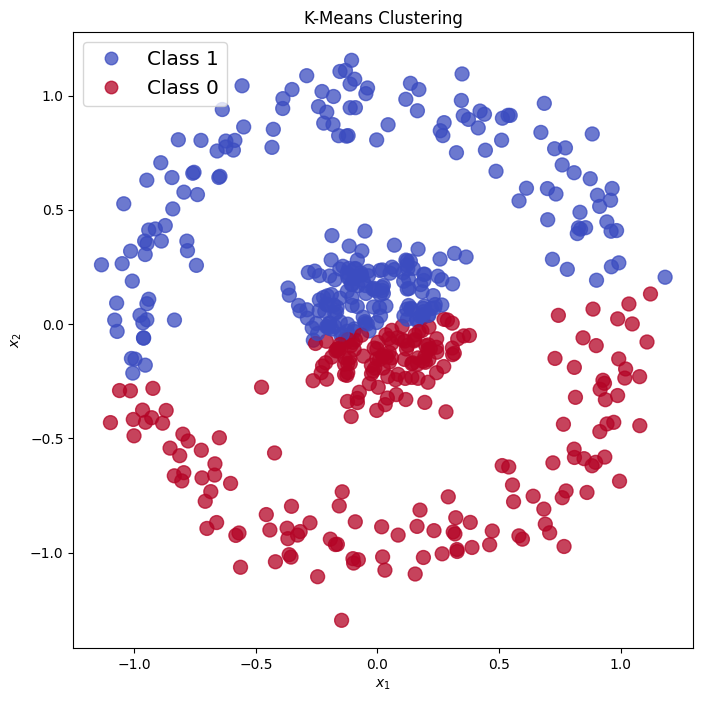

In [191]:
from sklearn.cluster import KMeans

x_df = pd.DataFrame(X)
def plot_clusters(X, y, title, labels=['Class 1','Class 0']):
    plt.figure(figsize=(8,8))
    scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
    plt.legend(handles=scatter.legend_elements()[0], labels=labels, fontsize='x-large', markerscale=1.5)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.show()
    
# Read the dataset
kmeans = KMeans(n_clusters = 2, random_state = 45, n_init='auto')
cluster_map = kmeans.fit_predict(x_df)

plot_clusters(X, cluster_map, "K-Means Clustering")

<font face="Arial" size=4> <br>
Now apply spectral clustering method on this dataset. You can use <code>sklearn.cluster.SpectralClustering</code> in this part. Also, use the KNN adjacency matrix for <b>$W$</b>.

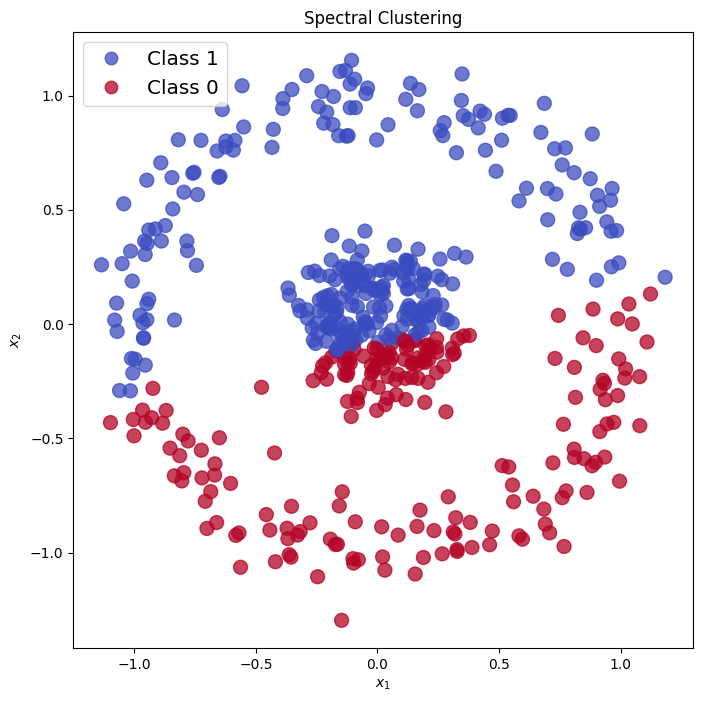

In [192]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=2, random_state=45)
spectral_cluster_map = spectral_clustering.fit_predict(x_df)

plot_clusters(X, spectral_cluster_map, "Spectral Clustering")

<font face="Arial" size=4> <br>
Change the adjacency matrix as the fully connected graph with rbf as the similarity measurement function. (Note that you can set this through the <code>affinity</code> parameter of the spectral clustering model.)

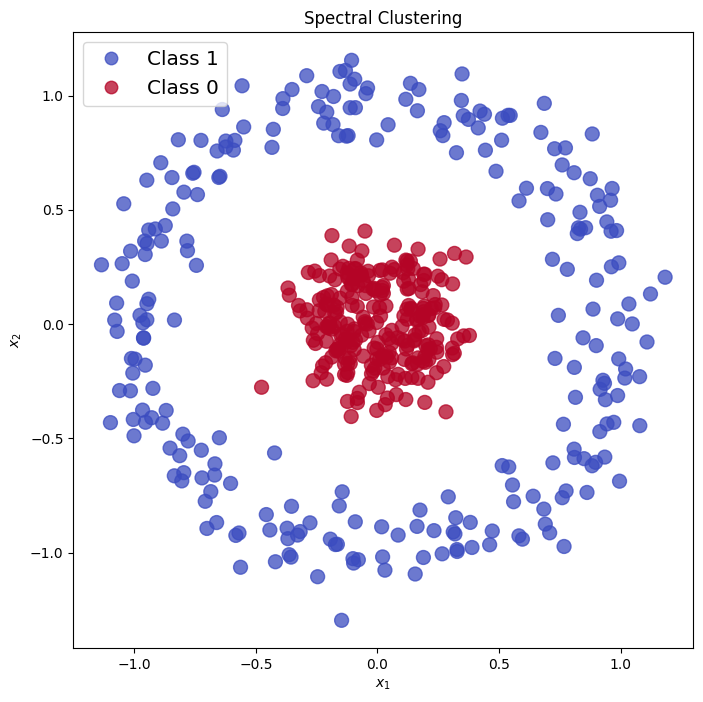

In [193]:
spectral_clustering = SpectralClustering(n_clusters=2, random_state=45, affinity='nearest_neighbors')
spectral_cluster_map = spectral_clustering.fit_predict(x_df)

plot_clusters(X, spectral_cluster_map, "Spectral Clustering")

<font face="Arial" size=4> <br>

Compare the results of K-Means model vs. Spectral Clustering methods. Also, mention the effect of <code>rbf</code> adjacency matrix on the result of spectral clustering model.

### Answer
When using rbf adjacency matrix as the affinity argument, kmeans and spectral clustering didn't differ much. Upon using the `nearest_neighbors` approach, the spectral clustering algorithm was able to successfully cluster data. 

# Part (D)

<font face="Arial" size=4><br>
Explain the pros and cons of spectral clustering methods. (Feel free to search more about its advantages and disadvantages through internet, but mention your sources.)

### Answer
Spectral clustering is a way to group data that is complicated and not straightforward to cluster using other methods like k-means. It has a solid foundation and is reliable. It can be used for many types of data like text and images. You can adjust spectral clustering for different situations by changing factors like the similarity measure and the number of clusters. But it can be slow for larger datasets because it needs to calculate the eigenvectors of the similarity matrix. It's challenging to pick the best kernel function and number of clusters, and sometimes, it might not group all data points together. Lastly, spectral clustering needs a similarity measure, which is tough to decide for complex data.

# Part (E): Clustering on Cancer Gene Expression RNA-seq dataset

### Part (E.1): Clustering
<font face="Arial" size=4><br>
This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set. It is a random extraction of gene expressions of patients having different types of tumor: 
    
BRCA (breast invasive carcinoma) <br>
KIRC (kidney renal clear cell carcinoma) <br>
COAD (colon adenocarcinoma) <br>
LUAD (lung adenocarcinoma) <br>
PRAD (prostate adenocarcinoma) <br> <br>
    
    
There are 801 instances with 20531 attributes, which are the gene expressions among different patients with each of this tumors. The data can be downloaded here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

<font face="Arial" size=4>
Assume that the true labels are unknown and we cannot use classification methods to distinguish cancer types. Use Spectral Clustering method and try to cluster the data as best as you can. You are allowed to use <code>sklearn.cluster.SpectralClustering</code> for this purpose. The choice of hyperparameters are on your own.

In [194]:
# Read the dataset
cancer_df = pd.read_csv('./clustering_data/data.csv')
cancer_df_id, cancer_df_data = pd.DataFrame(cancer_df['Unnamed: 0']), cancer_df[cancer_df.columns.difference(['Unnamed: 0'])]
cancer_df_data.iloc[:5, :10]


,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004
0,0.0,2.017209,0.591871,9.067588,10.282579,1.598651,8.000563,8.308148,4.877779,7.159912
1,0.0,0.592732,0.000000,11.463070,9.816923,3.962401,10.577674,6.289431,4.158030,6.008637
2,0.0,3.511759,0.000000,11.520388,9.701637,0.000000,1.981122,6.988969,5.851699,7.326951
3,0.0,3.663618,0.000000,10.582518,10.301290,2.175652,6.171159,8.619288,6.574097,6.725646
4,0.0,2.655741,0.000000,10.803849,10.275636,3.068860,7.802846,7.225689,7.888414,7.559339


In [195]:

sp_cancer_clust = SpectralClustering(n_clusters=5, random_state=45, affinity='nearest_neighbors', n_init=5)
sp_cancer_map = sp_cancer_clust.fit_predict(cancer_df_data)

sp_cancer_map

array([2, 3, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 3, 1, 1, 2, 0, 1,
       3, 0, 1, 3, 4, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 3, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 4, 0, 3, 0, 3, 0, 2, 4, 0, 0, 4, 1, 0, 3, 1, 0, 3, 2, 4,
       0, 2, 1, 0, 1, 0, 0, 3, 0, 3, 0, 1, 2, 4, 0, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 0, 1, 3, 1, 3, 4, 3, 3,
       2, 0, 3, 2, 0, 1, 1, 1, 0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 1, 0, 4, 0,
       4, 0, 0, 1, 3, 0, 1, 4, 0, 2, 0, 1, 3, 4, 2, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 2, 2, 3, 2, 3, 1, 0, 2, 3, 4, 1, 3, 0, 1, 3, 0, 3, 0, 0,
       0, 2, 0, 1, 4, 1, 0, 2, 2, 2, 3, 3, 0, 3, 3, 1, 3, 2, 3, 0, 0, 0,
       3, 3, 0, 1, 1, 1, 1, 2, 0, 2, 0, 3, 3, 0, 2, 0, 2, 0, 0, 0, 3, 0,
       1, 3, 1, 1, 3, 0, 1, 2, 0, 3, 3, 2, 4, 0, 1, 2, 1, 4, 0, 1, 1, 3,
       2, 2, 3, 3, 1, 0, 0, 4, 0, 2, 4, 0, 2, 1, 2, 2, 2, 0, 4, 4, 3, 4,
       4, 2, 3, 0, 0, 1, 1, 0, 4, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 2, 0,

In [196]:
# Mapping Cancer Labels (Names) to The Labels Assigned By Clusters
labels_df = pd.read_csv('./clustering_data/labels.csv')
labels_df = pd.DataFrame(labels_df.to_numpy(), columns=['Sample_ID', 'Disease_Cat'])
predicted_labels = pd.DataFrame(cancer_df_id.to_numpy(), columns=['Sample_ID']).join(pd.DataFrame(sp_cancer_map, columns=['Prediction']))



predicted_labels_count = predicted_labels.groupby(by='Prediction').count().sort_values(by='Sample_ID')
actual_labels_count = labels_df.groupby(by='Disease_Cat').count().sort_values(by='Sample_ID')
# actual_labels_count

pr_labels_sorted = predicted_labels_count.index.to_flat_index().tolist()
act_labels_sorted = actual_labels_count.index.to_flat_index().tolist()

labels_map = list(zip(pr_labels_sorted, act_labels_sorted))

### Part (E.2): Evaluation of Clustering Algorithm

<font face="Arial" size=4><br>
Search about the metrics that we can use for clustering purposes, given that we have the true labels of the data and we want to assess the performance of our clustering method. Give a short explanation about the <code>adjusted rand index(ARI)</code> and <code>normalized mutual information(NMI)</code> metrics and evaluate your model with these metrics. You are allowed to use <code>sklearn.metrics</code> in this part.

### Answer
The Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) are two ways to measure how well clustering algorithms are performing.
<br>
The ARI compares two sets of clustering results, one set containing the predicted clusters and the other set containing the true clusters. It accounts for false positives and false negatives, and adjusts for random chance. The ARI ranges from -1 to 1, where -1 means no similarity, 0 means random similarity, and 1 means perfect similarity.
<br>
The NMI measures the mutual information between two sets of clustering results, again one set being the predicted clusters and the other set being the true clusters. It normalizes the mutual information based on the sizes and numbers of clusters. The NMI ranges from 0 to 1, where 0 means no mutual information, and 1 means perfect mutual information.

In [197]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels_df['Disease_Cat'], predicted_labels['Prediction'])
nmi = normalized_mutual_info_score(labels_df['Disease_Cat'], predicted_labels['Prediction'])

print("Adjusted Rand Index Score: %3f" % ari)
print("Normalized Mutual Information: %3f" % nmi)


Adjusted Rand Index Score: 0.996258
Normalized Mutual Information: 0.994775


### Part (E.3): Visualization

<font face="Arial" size=4><br>
Visualize the ground truth labels and the predictions of your model in 2 figures. You can use <code>PCA</code> for dimensionality reduction before visualization. Also, you can use <code>t-SNE</code> from <code>sklearn.manifold.TSNE</code> instead. Other methods such as <code>UMAP</code> are accepted as well.

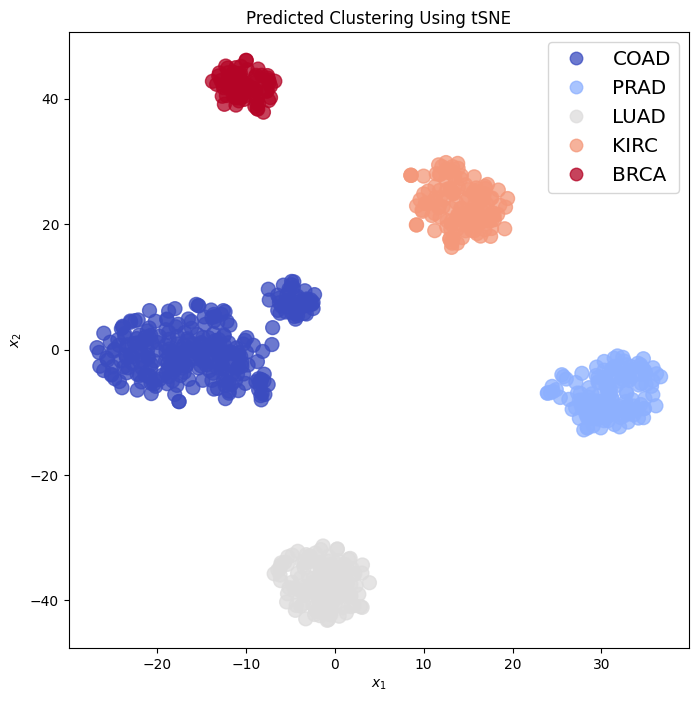

In [198]:
from sklearn.manifold import TSNE

# Use tSNE for dimentiality reduction
tsne = TSNE(n_components=2, random_state=45)
tsne_result = tsne.fit_transform(cancer_df_data)

# Plot the results with different colors for each predicted label
plot_clusters(tsne_result, predicted_labels.iloc[:, 1], 'Predicted Clustering Using tSNE', labels=[x[1] for x in labels_map])


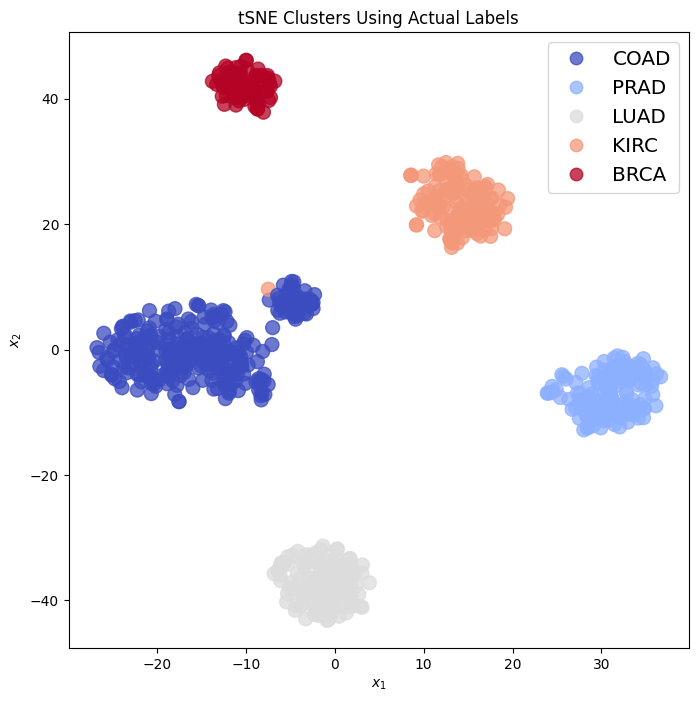

In [199]:
tsne_actual_labels = TSNE(n_components=2, random_state=45)
label_keys = [x[1] for x in labels_map]
label_values = [x[0] for x in labels_map]

actual_labels_df = labels_df['Disease_Cat'].map(dict(zip(label_keys, label_values)))
tsne_act_labels_result = tsne_actual_labels.fit_transform(cancer_df_data)


plot_clusters(tsne_act_labels_result, actual_labels_df, 'tSNE Clusters Using Actual Labels', labels=[x[1] for x in labels_map])
